<h1 style="text-align: center; font-weight: bolder">
    Métodos de Ensamble
</h1>

Consiste en combinar diferentes métodos de ML con diferentes configuraciones y aplicar un método para lograr un consenso.

La diversidad es una muy buena opción.

## **Estrategías**

### **Bagging (Bootstrap Aggregation)**

Consiste en ejecutar varios modelos en paralelo para que cada uno decida cual es el criterio de la respuesta. Finalmente, mediante algún metodo de consenso se decide la respuesta final.

#### **Procedimiento**

- Creamos particiones aleatorias (uniforme y con remplazo) del conjunto de datos original.
- Se construyen modelos de aprendizaje para cada uno de los subconjuntos por aparte.
- La respuesta final es la combinación (Por ejemplo, por votación) entre las respuestas individuales.

### **Boosting (Impulsar/Propulsar)**

Consiste en encadenar una serie de modelos. Busca fortalecer gradualmente un modelo de aprendizaje usando siempre el error residual de las etapas anteriores.

El resultado final tambien se obtiene por consenso entre todos los modelos.

## **Librerias**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## **Datos**

In [8]:
# Cargamos los datos
df = pd.read_csv('data/heart.csv')

In [18]:
# Prepamos nuestro dataset
features = df.drop('target', axis=1).copy()
target = df['target'].copy()

In [19]:
# Dividimos el dataset en base de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=13)

## **Modelos**

### **1. Modelo Base**

In [52]:
# Inicializamos el modelo 
knn_class = KNeighborsClassifier()

In [53]:
# Entrenamos el modelo
knn_class.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# Usamos nuestro modelo para predecir
y_pred_knn = knn_class.predict(X_test)

In [55]:
# Evaluamos el modelo
accuracy_score(y_pred_knn, y_test)

0.6963788300835655

In [78]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)

<AxesSubplot:>

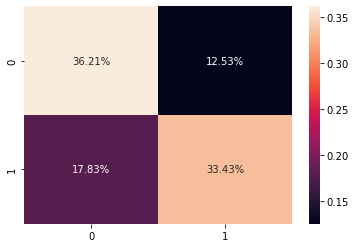

In [79]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

### **2. Metodo Bagging**

In [56]:
# Inicializamos el metodo
bag_class = BaggingClassifier(
    base_estimator=KNeighborsClassifier(),
    n_estimators=50
)

In [57]:
# Entrenamos el modelo
bag_class.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [58]:
# Usamos nuestro modelo para predecir
y_pred_bag = bag_class.predict(X_test)

In [59]:
# Evaluamos el modelo
accuracy_score(y_pred_bag, y_test)

0.7214484679665738

In [80]:
cf_matrix = confusion_matrix(y_test, y_pred_bag)

<AxesSubplot:>

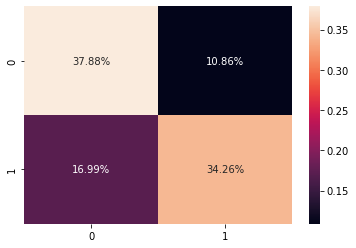

In [81]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

### **3. Metodo Boosting**

In [70]:
# Inicializamos el metodo
boost_class = GradientBoostingClassifier(
    n_estimators=50
)

In [71]:
# Entrenamos el modelo
boost_class.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [72]:
# Usamos nuestro modelo para predecir
y_pred_boost = boost_class.predict(X_test)

In [73]:
# Evaluamos el modelo
accuracy_score(y_pred_boost, y_test)

0.9164345403899722

In [82]:
cf_matrix = confusion_matrix(y_test, y_pred_boost)

<AxesSubplot:>

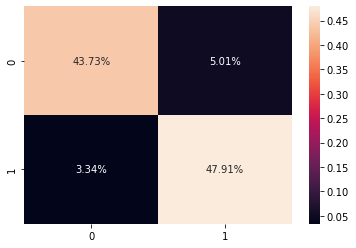

In [83]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [56]:
A = [3, 6, 4, 5, 2, 1]

In [22]:
def prueba(x):
    i = 1
    while i in x:
        i = i + 1
    return i

In [161]:
def solution(A):
    if max(A) < 0:
        return 1
    else: 
        i = 1
        while i in A:
            i = i + 1
        return i

In [162]:
solution([-1, -3])

1

In [57]:
minpositive(A)

7

In [182]:
A = 'babaaba'
B = 'ababa'

In [187]:
lista

[1, 50, 30]

In [190]:
def separar(x):
    separaciones = x.count('a')
    # return x.split('a')
    
    for i in range(separaciones):
        lista = []
        for i in x:
            lista.append(i)
            print(i)
            if i == 'a':
                break
        print('*'*10)
        print(lista)
        
separar(A)

b
a
**********
['b', 'a']
b
a
**********
['b', 'a']
b
a
**********
['b', 'a']
b
a
**********
['b', 'a']
